IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nltk
import pandas as pd
# from bertopic import BERTopic
# import gensim
# from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
# from sentence_transformers import SentenceTransformer
# from umap import UMAP
# from hdbscan import HDBSCAN


import random
import torch



In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [3]:
file = [
    r"E:\Gradious_Final_Project\datasets\Gachibowli_AB.csv",
    r"E:\Gradious_Final_Project\datasets\Jubilee_hills_AB.csv",
    r"E:\Gradious_Final_Project\datasets\Marathahalli_AB.csv",
    r"E:\Gradious_Final_Project\datasets\BTM_Layout_AB.csv",
    r"E:\Gradious_Final_Project\datasets\Mumbai_AB.csv",
    r"E:\Gradious_Final_Project\datasets\Whitefield_AB.csv",
    r"E:\Gradious_Final_Project\datasets\Banjara_hills_AB.csv"
]


In [4]:
#Read all CSV files and concatenate them into a single DataFrame
dfs = []
for file in file:
    df = pd.read_csv(file)
    dfs.append(df)

#Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

In [5]:
combined_df.shape

(8123, 7)

In [6]:
combined_df.head()

,Name,Review_Date,Review,Owner_Response,Response_Date,Response,Review_Date.1
0,Pramod Kumar,6 months ago,"Stop eating at this place, I have visited bang...",NaN,NaN,NaN,NaN
1,abhinav deep,a year ago,Food 2/5\nService 2/5\nAmbience 2/5 …,Response from the owner,a year ago,"Dear Guest, Sorry for the inconvenience caused...",NaN
2,Vijay Nammi,a month ago,Idiotic varieties for the price they have char...,NaN,NaN,NaN,NaN
3,surya ajay,a year ago,"I am posting this live now, this is one of the...",Response from the owner,a year ago,"Dear Guest, Sorry for the inconvenience caused...",NaN
4,Sai Hithesh,6 months ago,"We are pure vegetarians, I ordered veg biryani...",NaN,NaN,NaN,NaN


In [7]:
#Remove rows where the "Review" column is empty
combined_df.dropna(subset=['Review'], inplace=True)

In [8]:
combined_df.head()

,Name,Review_Date,Review,Owner_Response,Response_Date,Response,Review_Date.1
0,Pramod Kumar,6 months ago,"Stop eating at this place, I have visited bang...",NaN,NaN,NaN,NaN
1,abhinav deep,a year ago,Food 2/5\nService 2/5\nAmbience 2/5 …,Response from the owner,a year ago,"Dear Guest, Sorry for the inconvenience caused...",NaN
2,Vijay Nammi,a month ago,Idiotic varieties for the price they have char...,NaN,NaN,NaN,NaN
3,surya ajay,a year ago,"I am posting this live now, this is one of the...",Response from the owner,a year ago,"Dear Guest, Sorry for the inconvenience caused...",NaN
4,Sai Hithesh,6 months ago,"We are pure vegetarians, I ordered veg biryani...",NaN,NaN,NaN,NaN


SAVING THE DATAFRAME TO CSV

In [9]:
combined_df.to_csv("AB_Complaints.csv")

HANDLING MISSING VALUES

In [9]:
combined_df.isnull().sum()

Name                 0
Review_Date          0
Review               0
Owner_Response    2251
Response_Date     2593
Response          2251
Review_Date.1     3863
dtype: int64

In [10]:
combined_df.drop(columns=['Owner_Response','Review_Date.1'],axis=1,inplace=True)

In [11]:
# Fill Response_Date where it is NaT (missing) and Response is not NaT (exists)
combined_df.loc[combined_df['Response_Date'].isna() & combined_df['Response'].notna(), 'Response_Date'] = combined_df['Review_Date']

In [12]:
combined_df.isnull().sum()

Name                0
Review_Date         0
Review              0
Response_Date    2251
Response         2251
dtype: int64

In [13]:
combined_df.shape

(4205, 5)

DATA PREPROCESSING

In [14]:
import re
import nltk
from nltk.corpus import stopwords

# Function to preprocess reviews
def preprocess_review(review):
    review = review.lower()  # Convert to lowercase
    review = re.sub(r'[^a-zA-Z\s]', '', review)  # Remove punctuation and numbers
    review = re.sub(r'\s+', ' ', review).strip()  # Remove extra whitespace

    # Tokenization
    tokens = nltk.word_tokenize(review)  # Tokenize after cleaning
    # Remove stopwords and non-alphabetic tokens
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stopwords.words('english')]
    
    # Join filtered tokens back into a string
    return " ".join(filtered_tokens)

# Assuming you have your DataFrame combined_df
combined_df['Cleaned_Review'] = combined_df['Review'].apply(preprocess_review)

# Display the updated DataFrame
combined_df[['Review', 'Cleaned_Review']].head()


,Review,Cleaned_Review
0,"Stop eating at this place, I have visited bang...",stop eating place visited bangalores nd punes ...
1,Food 2/5\nService 2/5\nAmbience 2/5 …,food service ambience
2,Idiotic varieties for the price they have char...,idiotic varieties price charged varieties boil...
3,"I am posting this live now, this is one of the...",posting live one worst places dont visit pathe...
4,"We are pure vegetarians, I ordered veg biryani...",pure vegetarians ordered veg biryani swiggy go...


In [15]:
def preprocess_name(name):
    name = name.lower()  # Convert to lowercase
    name = re.sub(r'[^a-zA-Z\s]', '', name)  # Remove non-alphabetic characters
    return name.strip()  # Remove leading/trailing whitespace

combined_df['Cleaned_Name'] = combined_df['Name'].apply(preprocess_name)
combined_df[['Name', 'Cleaned_Name']].head()

,Name,Cleaned_Name
0,Pramod Kumar,pramod kumar
1,abhinav deep,abhinav deep
2,Vijay Nammi,vijay nammi
3,surya ajay,surya ajay
4,Sai Hithesh,sai hithesh


In [16]:
combined_df.head()

,Name,Review_Date,Review,Response_Date,Response,Cleaned_Review,Cleaned_Name
0,Pramod Kumar,6 months ago,"Stop eating at this place, I have visited bang...",NaN,NaN,stop eating place visited bangalores nd punes ...,pramod kumar
1,abhinav deep,a year ago,Food 2/5\nService 2/5\nAmbience 2/5 …,a year ago,"Dear Guest, Sorry for the inconvenience caused...",food service ambience,abhinav deep
2,Vijay Nammi,a month ago,Idiotic varieties for the price they have char...,NaN,NaN,idiotic varieties price charged varieties boil...,vijay nammi
3,surya ajay,a year ago,"I am posting this live now, this is one of the...",a year ago,"Dear Guest, Sorry for the inconvenience caused...",posting live one worst places dont visit pathe...,surya ajay
4,Sai Hithesh,6 months ago,"We are pure vegetarians, I ordered veg biryani...",NaN,NaN,pure vegetarians ordered veg biryani swiggy go...,sai hithesh


TOPIC MODELING USING BERTopic

In [ ]:
# import numpy as np
# import random
# import torch
# from sentence_transformers import SentenceTransformer
# from umap import UMAP
# from hdbscan import HDBSCAN
# from bertopic import BERTopic
# import joblib  # For saving the model

# # Set random seed for reproducibility
# np.random.seed(42)
# random.seed(42)
# torch.manual_seed(42)

# # Check if the 'Cleaned_Review' column exists
# if 'Cleaned_Review' not in combined_df.columns:
#     raise ValueError("The DataFrame does not contain a 'Cleaned_Review' column.")

# # Load a pre-trained Sentence Transformer model
# sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# # Create a UMAP instance with fixed random state
# umap_model = UMAP(n_neighbors=40, min_dist=0.0, metric='cosine', random_state=42)

# # Create an HDBSCAN instance with fixed parameters
# hdbscan_model = HDBSCAN(min_cluster_size=15, prediction_data=True)

# # Set the desired number of topics
# desired_num_topics = 60  # Modify this value as needed

# # Create a BERTopic model with the specified number of topics
# topic_model = BERTopic(
#     embedding_model=sentence_model,
#     umap_model=umap_model,
#     hdbscan_model=hdbscan_model,
#     calculate_probabilities=True,
#     nr_topics=desired_num_topics,
# )

# # Fit the model on the processed reviews
# topics, probabilities = topic_model.fit_transform(combined_df['Cleaned_Review'].tolist())

# # Save the trained model
# joblib.dump(topic_model, 'bertopic_model.pkl')

# # Get topic information
# topic_info = topic_model.get_topic_info()

# # Display the number of topics found
# num_topics = topic_info.shape[0]
# print(f'Number of topics: {num_topics}')

# # Display topics with their keywords
# print("\nTopics and their keywords:")
# for i in range(num_topics):
#     try:
#         topic_keywords = topic_model.get_topic(i)
#         if topic_keywords:
#             formatted_keywords = ", ".join([word for word, _ in topic_keywords])
#             num_documents = topic_info[topic_info['Topic'] == i]['Count'].values[0]
#             print(f"Topic {i}: {formatted_keywords} (Documents: {num_documents})")
#         else:
#             print(f"Topic {i} has no keywords.")
#     except Exception as e:
#         print(f"Error retrieving keywords for Topic {i}: {e}")

# # Optionally, visualize the topics
# # topic_model.visualize_topics()  # Uncomment if visualization is needed


Number of topics: 38

Topics and their keywords:
Topic 0: ok, placethere, okish, powai, better, options, , , ,  (Documents: 21)
Topic 1: reasons, god, rubbish, avoid, naramal, fuddu, eight, omg, word, words (Documents: 31)
Topic 2: kannada, song, karnataka, speak, play, songs, andre, knows, played, hindi (Documents: 27)
Topic 3: cockroach, cockroaches, found, hygiene, roaming, plate, picture, small, table, area (Documents: 25)
Topic 4: abs, experience, food, worst, disappointed, quality, time, taste, visited, bs (Documents: 181)
Topic 5: vegetarian, vegetarians, options, non, less, good, veg, place, option, food (Documents: 141)
Topic 6: branch, hills, branches, banjara, jubilee, experience, visited, whitefield, marathahalli, times (Documents: 47)
Topic 7: service, poor, satisfied, ever, pros, thanks, good, bad, bloody, raj (Documents: 34)
Topic 8: parking, valet, car, park, valets, traffic, space, vehicle, parked, road (Documents: 47)
Topic 9: ambience, food, good, service, ok, great,

In [ ]:
# category_labels = ['Service Issue', "Food Options", "Food Quality", "Atmosphere", "Value for Money", "Hygiene", "Others"]

# topic_labels = {
#     -1: ["Others"],                                      # Unrecognized topics
#     0: ["Food Options", "Atmosphere"],                                 # General food references
#     1: ["Others"],                                 # Reasons to avoid
#     2: ["Atmosphere"],                                 # Kannada and cultural references
#     3: ["Hygiene"],                                     # Cockroach issue
#     4: ["Food Quality","Hygiene"],                                 # Disappointment in experience
#     5: ["Food Options"],                               # Vegetarian options
#     6: ["Atmosphere"],                 # Branch experience
#     7: ["Service Issue"],                                # General service complaints
#     8: ["Atmosphere"],                                  # Parking issues
#     9: ["Food Quality", "Atmosphere","Service Issue"],                  # General ambiance
#     10: ["Atmosphere"],                 # Loud music complaints
#     11: ["Food Quality", "Food Options"],      # Starters and desserts
#     12: ["Food Quality", "Food Options"],                           # Biryani quality
#     13: ["Food Quality"],                               # General food quality
#     14: ["Food Quality", "Food Options"],                              # Paneer and vegetarian options
#     15: ["Food Options", "Food Quality","Value for Money"],                               # Pure vegetarian options
#     16: ["Atmosphere"],                                 # Birthday celebration ambiance
#     17: ["Food Options", "Atmosphere","Value for Money"],           # Buffet experience
#     18: ["Atmosphere"],                                 # General family dining experience
#     19: ["Food Options"],                              # Starters quality
#     20: ["Food Quality", "Food Options"],                              # Prawn and fish quality
#     21: ["Atmosphere", "Food Options"],                               # BBQ references
#     22: ["Food Quality"],                               # Spicy food and service
#     23: ["Service Issue"],                              # Average service
#     24: ["Atmosphere","Service Issue"],                              # Crowding and slow service
#     25: ["Food Quality"],                                   # Dirty plates and cleanliness
#     26: ["Hygiene"],                                   # General cleanliness
#     27: ["Atmosphere"],                                 # Weekend dining experience
#     28: ["Food Quality"],                               # General taste complaints
#     29: ["Food Quality"],                               # Tasteless food
#     30: ["Service Issue"],                              # Staff complaints
#     31: ["Service Issue", "Hygiene"],                               # Great lunch experiences
#     32: ["Service Issue"],                              # Waiters and serving time
#     33: ["Service Issue"],                              # Booking and reservation issues
#     34: ["Service Issue", "Food Quality"],                              # Worst service experiences
#     35: ["Service Issue", "Food Quality"],                               # Reduction in food quality
#     36: ["Food Quality", "Service Issue"],                              # Overall food quality
#     37: ["Others"],                                 # General complaints
# }

# topic_info['Label'] = topic_info['Topic'].map(topic_labels)
# topic_info[['Topic', 'Count', 'Label']]


,Topic,Count,Label
0,-1,1668,[Others]
1,0,21,"[Food Options, Atmosphere]"
2,1,31,[Others]
3,2,27,[Atmosphere]
4,3,25,[Hygiene]
5,4,181,"[Food Quality, Hygiene]"
6,5,141,[Food Options]
7,6,47,[Atmosphere]
8,7,34,[Service Issue]
9,8,47,[Atmosphere]


MAPPING TOPICS TO CATEGORIES

In [ ]:
# combined_df['Topics'] = topics

# combined_df['Category'] = combined_df['Topics'].map(topic_labels)

CONVERTING REVIEW DATE TO DAYS

In [17]:
def convert_to_days(review_dates):
    # Check if the input is null or empty
    if pd.isnull(review_dates) or review_dates.strip() == '':
        return -1  # Store -1 for null values
    
    # Create a dictionary for conversion
    time_in_days = {
        'year': 365,
        'month': 30,
        'week': 7,
        'day': 1
    }
    
    list1 = review_dates.split()[:2]  # Only take the first two words
    days = 0
    
    number = 1 if list1[0] == 'a' else int(list1[0])
    unit = list1[1].rstrip('s')  # Remove the plural 's'
    
    days += number * time_in_days[unit]
    
    return days


In [21]:
combined_df['Review_Days'] = combined_df['Review_Date'].map(convert_to_days)

In [22]:
combined_df.isnull().sum()

Name                 0
Review_Date          0
Review               0
Response_Date     2251
Response          2251
Cleaned_Review       0
Cleaned_Name         0
Topics               0
Category             0
Review_Days          0
dtype: int64

IDENTIFYING UNIQUE AND REPEAT CUSTOMERS

In [23]:
#Finding Unique Customers
dictionary = combined_df['Cleaned_Name'].value_counts()
dictionary = dictionary.to_dict()

In [24]:
combined_df['Unique_Customer'] = combined_df['Cleaned_Name'].apply(lambda x: 'First_Time' if dictionary[x] == 1 else 'Repeat')

In [25]:
combined_df.isnull().sum()

Name                  0
Review_Date           0
Review                0
Response_Date      2251
Response           2251
Cleaned_Review        0
Cleaned_Name          0
Topics                0
Category              0
Review_Days           0
Unique_Customer       0
dtype: int64

SEVERITY CLASSIFICATION USING SENTIMENT ANALYSIS

In [26]:
from transformers import pipeline

# Load a sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Analyze sentiment
sentiments = sentiment_pipeline(combined_df['Cleaned_Review'].tolist())
list (sentiments)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'NEGATIVE', 'score': 0.9993200302124023},
 {'label': 'POSITIVE', 'score': 0.9989683628082275},
 {'label': 'NEGATIVE', 'score': 0.999792754650116},
 {'label': 'NEGATIVE', 'score': 0.9995315074920654},
 {'label': 'NEGATIVE', 'score': 0.9987488985061646},
 {'label': 'NEGATIVE', 'score': 0.9986369013786316},
 {'label': 'NEGATIVE', 'score': 0.9904683232307434},
 {'label': 'NEGATIVE', 'score': 0.9980587363243103},
 {'label': 'NEGATIVE', 'score': 0.9968034029006958},
 {'label': 'NEGATIVE', 'score': 0.9990241527557373},
 {'label': 'NEGATIVE', 'score': 0.6061050891876221},
 {'label': 'NEGATIVE', 'score': 0.9996324777603149},
 {'label': 'NEGATIVE', 'score': 0.9994240999221802},
 {'label': 'NEGATIVE', 'score': 0.9955106973648071},
 {'label': 'NEGATIVE', 'score': 0.9995400905609131},
 {'label': 'NEGATIVE', 'score': 0.9991546869277954},
 {'label': 'NEGATIVE', 'score': 0.9974332451820374},
 {'label': 'NEGATIVE', 'score': 0.9997349381446838},
 {'label': 'NEGATIVE', 'score': 0.9957938194274

SENTIMENT ANALYSIS USING TEXTBLOB

In [27]:
from textblob import TextBlob

In [28]:
# Function to calculate sentiment using TextBlob
def get_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity  # Return polarity score

# Apply the function to the 'Review' column
combined_df['Sentiment_Score'] = combined_df['Cleaned_Review'].apply(get_sentiment)

In [29]:
def get_severity(sentiment_score):
	if sentiment_score > 0.1:
		return "Low"
	elif sentiment_score >= -0.1:
		return "Medium"
	else:
		return "High"



# Apply the function to the sentiment scores
combined_df['Severity'] = combined_df['Cleaned_Review'].apply(lambda review: get_severity(TextBlob(review).sentiment.polarity))

# Display the updated DataFrame
combined_df['Severity'].value_counts()

Severity
Low       2120
High      1079
Medium    1006
Name: count, dtype: int64

In [30]:
combined_df.isnull().sum()

Name                  0
Review_Date           0
Review                0
Response_Date      2251
Response           2251
Cleaned_Review        0
Cleaned_Name          0
Topics                0
Category              0
Review_Days           0
Unique_Customer       0
Sentiment_Score       0
Severity              0
dtype: int64

In [31]:
list1 = list(combined_df['Cleaned_Review'])

In [254]:
# # Assuming 'sentiment_scores' is a list of sentiment scores
# plt.hist(list1, bins=20, edgecolor='black')
# plt.title("Distribution of Sentiment Scores")
# plt.xlabel("Sentiment Score")
# plt.ylabel("Frequency")
# plt.show()

IDENTIFYING FREQUENCY OF COMPLAINT TYPE USING TF-IDF AND COSINE SIMILARITY

In [32]:
# creating TfidfVectorizer

vectorizer = TfidfVectorizer()

x = vectorizer.fit_transform(combined_df["Cleaned_Review"])

In [33]:
threshold = 0.7

In [34]:
cosine_sim = cosine_similarity(x, x)

In [35]:
combined_df['Is_Repeated'] = False

# Step 5: Loop through the similarity matrix and mark similar reviews
for i in range(len(cosine_sim)):
    for j in range(i + 1, len(cosine_sim)):
        if cosine_sim[i][j] > threshold:
            combined_df.loc[j, 'Is_Repeated'] = True  # Mark the repeated review

In [36]:
combined_df['Is_Repeated'].value_counts()

Is_Repeated
False    4140
True      113
Name: count, dtype: int64

In [37]:
combined_df.isnull().sum()

Name                 48
Review_Date          48
Review               48
Response_Date      2299
Response           2299
Cleaned_Review       48
Cleaned_Name         48
Topics               48
Category             48
Review_Days          48
Unique_Customer      48
Sentiment_Score      48
Severity             48
Is_Repeated           0
dtype: int64

In [38]:
combined_df['Frequency_Of_Complaint_Type'] = combined_df['Is_Repeated'].apply(lambda x: 'Repeated' if x == True else 'Unique')

In [39]:
combined_df.isnull().sum()

Name                             48
Review_Date                      48
Review                           48
Response_Date                  2299
Response                       2299
Cleaned_Review                   48
Cleaned_Name                     48
Topics                           48
Category                         48
Review_Days                      48
Unique_Customer                  48
Sentiment_Score                  48
Severity                         48
Is_Repeated                       0
Frequency_Of_Complaint_Type       0
dtype: int64

COMPLAINT URGENCY

In [40]:
combined_df['Urgency'] = combined_df['Sentiment_Score'].apply(lambda x: 'Urgent' if x < -0.1 else 'Non-Urgent') 

In [41]:
combined_df['Urgency'].value_counts()

Urgency
Non-Urgent    3174
Urgent        1079
Name: count, dtype: int64

In [42]:
combined_df.isnull().sum()

Name                             48
Review_Date                      48
Review                           48
Response_Date                  2299
Response                       2299
Cleaned_Review                   48
Cleaned_Name                     48
Topics                           48
Category                         48
Review_Days                      48
Unique_Customer                  48
Sentiment_Score                  48
Severity                         48
Is_Repeated                       0
Frequency_Of_Complaint_Type       0
Urgency                           0
dtype: int64

ACKNOWLEDGEMENT TIME (RESPONSE TIME)

In [43]:
combined_df['Response_Days'] = combined_df['Response_Date'].map(convert_to_days)

In [44]:
combined_df.isnull().sum()

Name                             48
Review_Date                      48
Review                           48
Response_Date                  2299
Response                       2299
Cleaned_Review                   48
Cleaned_Name                     48
Topics                           48
Category                         48
Review_Days                      48
Unique_Customer                  48
Sentiment_Score                  48
Severity                         48
Is_Repeated                       0
Frequency_Of_Complaint_Type       0
Urgency                           0
Response_Days                     0
dtype: int64

CALCULATING CUSTOMER SATISFACTION BASED ON RESPONSE AND REVIEW DAYS

In [45]:
# Customer Satisfaction Function based on Response_Days and Review_Days
def calculate_satisfaction(response_days, review_days):
    if response_days == -1:  # No response case
        return 'No Response'
    
    days_difference = response_days - review_days  # Calculate difference internally
    
    if days_difference <= 0:
        return 'High Satisfaction'  # Response was immediate or before the review
    elif 1 <= days_difference <= 3:
        return 'Medium Satisfaction'  # Response within a few days
    else:
        return 'Low Satisfaction'  # Delayed response

# Apply the customer satisfaction calculation
combined_df['Customer_Satisfaction'] = combined_df.apply(
    lambda row: calculate_satisfaction(row['Response_Days'], row['Review_Days']),
    axis=1
)

# Display the DataFrame with customer satisfaction
combined_df[['Review_Date', 'Response_Days', 'Review_Days', 'Response_Days', 'Customer_Satisfaction']]

,Review_Date,Response_Days,Review_Days,Response_Days,Customer_Satisfaction
0,6 months ago,-1,180.0,-1,No Response
1,a year ago,365,365.0,365,High Satisfaction
2,a month ago,-1,30.0,-1,No Response
3,a year ago,365,365.0,365,High Satisfaction
4,6 months ago,-1,180.0,-1,No Response
...,...,...,...,...,...
3833,NaN,-1,NaN,-1,No Response
3850,NaN,-1,NaN,-1,No Response
3283,NaN,-1,NaN,-1,No Response
3856,NaN,-1,NaN,-1,No Response


In [46]:
combined_df.head()

,Name,Review_Date,Review,Response_Date,Response,Cleaned_Review,Cleaned_Name,Topics,Category,Review_Days,Unique_Customer,Sentiment_Score,Severity,Is_Repeated,Frequency_Of_Complaint_Type,Urgency,Response_Days,Customer_Satisfaction
0,Pramod Kumar,6 months ago,"Stop eating at this place, I have visited bang...",NaN,NaN,stop eating place visited bangalores nd punes ...,pramod kumar,-1.0,[Others],180.0,Repeat,-0.350000,High,False,Unique,Urgent,-1,No Response
1,abhinav deep,a year ago,Food 2/5\nService 2/5\nAmbience 2/5 …,a year ago,"Dear Guest, Sorry for the inconvenience caused...",food service ambience,abhinav deep,9.0,"[Food Quality, Atmosphere, Service Issue]",365.0,First_Time,0.000000,Medium,False,Unique,Non-Urgent,365,High Satisfaction
2,Vijay Nammi,a month ago,Idiotic varieties for the price they have char...,NaN,NaN,idiotic varieties price charged varieties boil...,vijay nammi,-1.0,[Others],30.0,First_Time,-0.388889,High,False,Unique,Urgent,-1,No Response
3,surya ajay,a year ago,"I am posting this live now, this is one of the...",a year ago,"Dear Guest, Sorry for the inconvenience caused...",posting live one worst places dont visit pathe...,surya ajay,34.0,"[Service Issue, Food Quality]",365.0,First_Time,-0.772727,High,False,Unique,Urgent,365,High Satisfaction
4,Sai Hithesh,6 months ago,"We are pure vegetarians, I ordered veg biryani...",NaN,NaN,pure vegetarians ordered veg biryani swiggy go...,sai hithesh,5.0,[Food Options],180.0,First_Time,0.214286,Low,False,Unique,Non-Urgent,-1,No Response


In [47]:
combined_df.isnull().sum()

Name                             48
Review_Date                      48
Review                           48
Response_Date                  2299
Response                       2299
Cleaned_Review                   48
Cleaned_Name                     48
Topics                           48
Category                         48
Review_Days                      48
Unique_Customer                  48
Sentiment_Score                  48
Severity                         48
Is_Repeated                       0
Frequency_Of_Complaint_Type       0
Urgency                           0
Response_Days                     0
Customer_Satisfaction             0
dtype: int64

In [48]:
# Display rows with any null values in the DataFrame
null_rows = combined_df[combined_df.isnull().any(axis=1)]

# Show the DataFrame with null rows
null_rows


,Name,Review_Date,Review,Response_Date,Response,Cleaned_Review,Cleaned_Name,Topics,Category,Review_Days,Unique_Customer,Sentiment_Score,Severity,Is_Repeated,Frequency_Of_Complaint_Type,Urgency,Response_Days,Customer_Satisfaction
0,Pramod Kumar,6 months ago,"Stop eating at this place, I have visited bang...",NaN,NaN,stop eating place visited bangalores nd punes ...,pramod kumar,-1.0,[Others],180.0,Repeat,-0.350000,High,False,Unique,Urgent,-1,No Response
2,Vijay Nammi,a month ago,Idiotic varieties for the price they have char...,NaN,NaN,idiotic varieties price charged varieties boil...,vijay nammi,-1.0,[Others],30.0,First_Time,-0.388889,High,False,Unique,Urgent,-1,No Response
4,Sai Hithesh,6 months ago,"We are pure vegetarians, I ordered veg biryani...",NaN,NaN,pure vegetarians ordered veg biryani swiggy go...,sai hithesh,5.0,[Food Options],180.0,First_Time,0.214286,Low,False,Unique,Non-Urgent,-1,No Response
5,armaan akhter,a week ago,waste management they gave us time 3.30 PM @Ga...,NaN,NaN,waste management gave us time pm gachibowli br...,armaan akhter,34.0,"[Service Issue, Food Quality]",7.0,First_Time,-0.375000,High,False,Unique,Urgent,-1,No Response
8,Keshav Akkineni,3 months ago,"The food was not good at all. The plates, spoo...",NaN,NaN,food good plates spoons bowls cleaned properly...,keshav akkineni,-1.0,[Others],90.0,First_Time,-0.083333,Medium,False,Unique,Non-Urgent,-1,No Response
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Repeated,Non-Urgent,-1,No Response
3850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Repeated,Non-Urgent,-1,No Response
3283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Repeated,Non-Urgent,-1,No Response
3856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Repeated,Non-Urgent,-1,No Response


DELETING NULL ROWS

In [49]:
# Set the threshold for non-null values
# For example, keep rows with at least 5 non-null values
threshold = 6

# Drop rows with less than the specified threshold of non-null values
combined_df = combined_df.dropna(thresh=threshold)

# Check the number of null values after deletion
print(combined_df.isnull().sum())


Name                              0
Review_Date                       0
Review                            0
Response_Date                  2251
Response                       2251
Cleaned_Review                    0
Cleaned_Name                      0
Topics                            0
Category                          0
Review_Days                       0
Unique_Customer                   0
Sentiment_Score                   0
Severity                          0
Is_Repeated                       0
Frequency_Of_Complaint_Type       0
Urgency                           0
Response_Days                     0
Customer_Satisfaction             0
dtype: int64


In [50]:
combined_df.shape

(4205, 18)

In [51]:

data = combined_df[['Review','Cleaned_Review', 'Cleaned_Name', 'Topics', 'Category', 
                      'Severity', 'Is_Repeated','Unique_Customer', 'Sentiment_Score','Frequency_Of_Complaint_Type', 
                      'Urgency', 'Customer_Satisfaction', 'Review_Days', 
                      'Response_Days']].copy()

# Optionally, reset the index of the new DataFrame
data.reset_index(drop=True, inplace=True)

# Display the new DataFrame
data.head()


,Review,Cleaned_Review,Cleaned_Name,Topics,Category,Severity,Is_Repeated,Unique_Customer,Sentiment_Score,Frequency_Of_Complaint_Type,Urgency,Customer_Satisfaction,Review_Days,Response_Days
0,"Stop eating at this place, I have visited bang...",stop eating place visited bangalores nd punes ...,pramod kumar,-1.0,[Others],High,False,Repeat,-0.350000,Unique,Urgent,No Response,180.0,-1
1,Food 2/5\nService 2/5\nAmbience 2/5 …,food service ambience,abhinav deep,9.0,"[Food Quality, Atmosphere, Service Issue]",Medium,False,First_Time,0.000000,Unique,Non-Urgent,High Satisfaction,365.0,365
2,Idiotic varieties for the price they have char...,idiotic varieties price charged varieties boil...,vijay nammi,-1.0,[Others],High,False,First_Time,-0.388889,Unique,Urgent,No Response,30.0,-1
3,"I am posting this live now, this is one of the...",posting live one worst places dont visit pathe...,surya ajay,34.0,"[Service Issue, Food Quality]",High,False,First_Time,-0.772727,Unique,Urgent,High Satisfaction,365.0,365
4,"We are pure vegetarians, I ordered veg biryani...",pure vegetarians ordered veg biryani swiggy go...,sai hithesh,5.0,[Food Options],Low,False,First_Time,0.214286,Unique,Non-Urgent,No Response,180.0,-1


In [53]:
data.to_csv("Final_AB_Complaint_Classification_Restaurant.csv")

In [59]:
df = pd.read_csv("Final_AB_Complaint_Classification_Restaurant.csv")
df.head()

,Unnamed: 0,Review,Cleaned_Review,Cleaned_Name,Topics,Category,Severity,Is_Repeated,Unique_Customer,Sentiment_Score,...,Customer_Satisfaction,Review_Days,Response_Days,Service Issue,Food Options,Food Quality,Atmosphere,Value for Money,Hygiene,Others
0,0,"Stop eating at this place, I have visited bang...",stop eating place visited bangalores nd punes ...,pramod kumar,-1.0,['Others'],High,False,Repeat,-0.350000,...,No Response,180.0,-1,0,0,0,0,0,0,1
1,1,Food 2/5\nService 2/5\nAmbience 2/5 …,food service ambience,abhinav deep,9.0,"['Food Quality', 'Atmosphere', 'Service Issue']",Medium,False,First_Time,0.000000,...,High Satisfaction,365.0,365,1,0,1,1,0,0,0
2,2,Idiotic varieties for the price they have char...,idiotic varieties price charged varieties boil...,vijay nammi,-1.0,['Others'],High,False,First_Time,-0.388889,...,No Response,30.0,-1,0,0,0,0,0,0,1
3,3,"I am posting this live now, this is one of the...",posting live one worst places dont visit pathe...,surya ajay,34.0,"['Service Issue', 'Food Quality']",High,False,First_Time,-0.772727,...,High Satisfaction,365.0,365,1,0,1,0,0,0,0
4,4,"We are pure vegetarians, I ordered veg biryani...",pure vegetarians ordered veg biryani swiggy go...,sai hithesh,5.0,['Food Options'],Low,False,First_Time,0.214286,...,No Response,180.0,-1,0,1,0,0,0,0,0


In [54]:
def review_severity(review):
    sentiment = get_sentiment(review)  # Use the existing function to get sentiment
    return sentiment  # Return the severity of the sentiment

# Example usage
user_review = "I hate this food! It tastes bad."
severity = review_severity(user_review)
print(f"Sentiment Score: {severity}")
print(f"Severity Level: "+get_severity(severity))

Sentiment Score: -0.8499999999999999
Severity Level: High


In [55]:
# Function to determine urgency based on sentiment score
def review_urgency(review):
    sentiment_score = get_sentiment(review)  # Calculate sentiment score
    return 'Urgent' if sentiment_score < -0.1 else 'Non-Urgent'  # Determine urgency

# Example usage
user_review = "I hate this food! It tastes bad."
urgency = review_urgency(user_review)
print(f"Urgency Level: {urgency}")

Urgency Level: Urgent


DATA VISUALIZATION

In [30]:
df = pd.read_csv(r"E:\Gradious_Final_Project\Preprocessing\Final_Dataset.csv")

In [31]:
df.columns

Index(['Index', 'Review', 'Cleaned_Review', 'Cleaned_Name', 'Severity',
       'Urgency', 'Customer_Satisfaction', 'Review_Days', 'Response_Days',
       'Predicted_Category', 'Probabilities', 'Mapped_Category', 'Hygiene',
       'Food Quality', 'Atmosphere', 'Value for Money', 'Service Issue',
       'Positive Review', 'Food Options', 'Review_Date'],
      dtype='object')

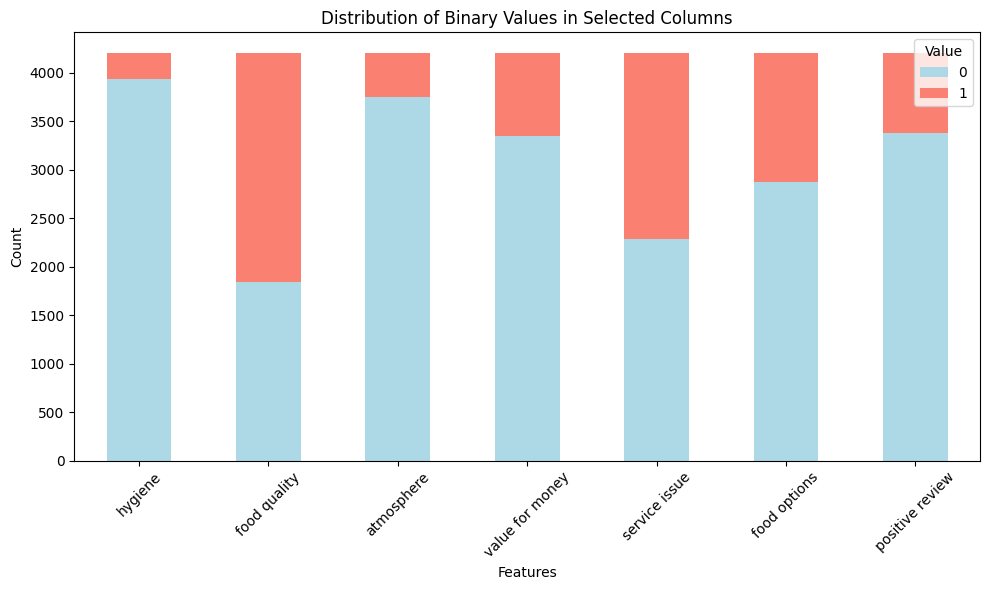

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and it has been loaded properly

# Columns of interest
columns_of_interest = ['hygiene','food quality', 'atmosphere', 'value for money', 'service issue','food options','positive review']
# Check which columns exist in the DataFrame
existing_columns = [col for col in columns_of_interest if col in df.columns]

# Ensure that there are valid columns to plot
if existing_columns:
    # Count occurrences of 1s and 0s for each existing column
    count_data = df[existing_columns].apply(lambda x: x.value_counts()).T.fillna(0)

    # Plotting the count of 0s and 1s
    count_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
    plt.title('Distribution of Binary Values in Selected Columns')
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Value', labels=['0', '1'])
    plt.tight_layout()
    plt.show()
else:
    print("No valid columns to plot.")


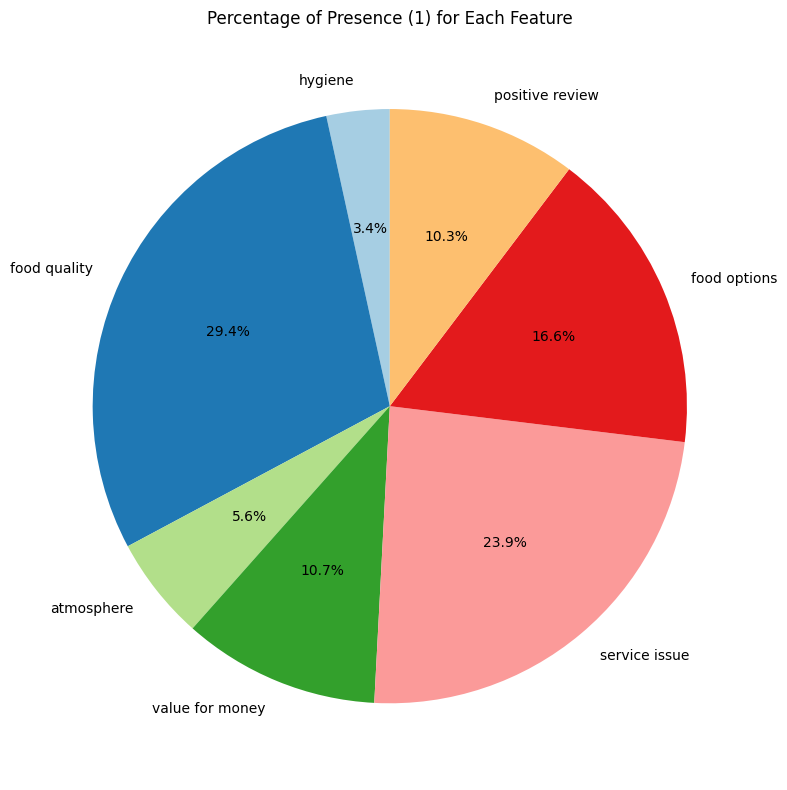

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and it has been loaded properly

# Columns of interest
columns_of_interest = ['hygiene', 'food quality', 'atmosphere', 'value for money', 
                       'service issue', 'food options', 'positive review']

# Check which columns exist in the DataFrame
existing_columns = [col for col in columns_of_interest if col in df.columns]

# Ensure that there are valid columns to plot
if existing_columns:
    # Count the total number of 1s for each column
    ones_count = df[existing_columns].sum()

    # Plotting a single pie chart for the count of 1s in each column
    plt.figure(figsize=(8, 8))
    plt.pie(ones_count, labels=ones_count.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
    plt.title('Percentage of Presence (1) for Each Feature')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()

else:
    print("No valid columns to plot.")
